<a href="https://colab.research.google.com/github/anand176/JackFruit__Ripeness-Detection-System/blob/master/Mobilenet_confmatrix_one.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub


model_path = '/content/drive/MyDrive/cd_ss/pjcone_model.h5'


model = tf.keras.models.load_model(model_path,custom_objects={'KerasLayer':hub.KerasLayer}, compile=False)
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['acc'])

In [ ]:
import os
tlabels=[]
c1,c2=0,0
file_names=os.listdir('/content/drive/MyDrive/ripenconfusionmatrix/ripen/')
# print(file_names)
for file in file_names:

    # if file[0]=='r':
        # c1=c1+1
      tlabels.append(1)
      c1=c1+1
file_names=os.listdir('/content/drive/MyDrive/unripenconfusionmatrix/unripen/')
for file in file_names:

    # if file[0]=='r':
        # c1=c1+1
      tlabels.append(0)
      c2=c2+1

print(c1,c2)

64 64


In [ ]:
from ast import In
import cv2
import numpy as np

plabel = []
file_names=os.listdir('/content/drive/MyDrive/ripenconfusionmatrix/ripen')

for file in file_names:
    input_image_path = '/content/drive/MyDrive/ripenconfusionmatrix/ripen/' + file
    input_image = cv2.imread(input_image_path)
    input_image_resize = cv2.resize(input_image, (224, 224))
    input_image_scaled = input_image_resize / 255
    image_reshaped = np.reshape(input_image_scaled, [1, 224, 224, 3])
    input_prediction = model.predict(image_reshaped)
    input_pred_label=np.argmax(input_prediction)
    if input_pred_label==1:
    # if input_prediction[0][0] > 0.5:
        plabel.append(1)
    else:
        plabel.append(0)
file_names=os.listdir('/content/drive/MyDrive/unripenconfusionmatrix/unripen')
for file in file_names:
    input_image_path = '/content/drive/MyDrive/unripenconfusionmatrix/unripen/' + file
    input_image = cv2.imread(input_image_path)
    input_image_resize = cv2.resize(input_image, (224, 224))
    input_image_scaled = input_image_resize / 255
    image_reshaped = np.reshape(input_image_scaled, [1, 224, 224, 3])
    input_prediction = model.predict(image_reshaped)
    input_pred_label=np.argmax(input_prediction)
    if input_pred_label==1:
    # if input_prediction[0][0] > 0.5:
        plabel.append(1)
    else:
        plabel.append(0)

print(plabel)

1/1 [==============================] - 0s 43ms/step
[0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np


true_labels = np.array(tlabels)
predicted_labels = np.array(plabel)


cm = confusion_matrix(true_labels, predicted_labels)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[44 20]
 [ 6 58]]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

true_labels = np.array(tlabels)
predicted_labels = np.array(plabel)


accuracy = accuracy_score(true_labels, predicted_labels)


precision = precision_score(true_labels, predicted_labels)


recall = recall_score(true_labels, predicted_labels)


f1 = f1_score(true_labels, predicted_labels)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.796875
Precision: 0.7435897435897436
Recall: 0.90625
F1 Score: 0.8169014084507042


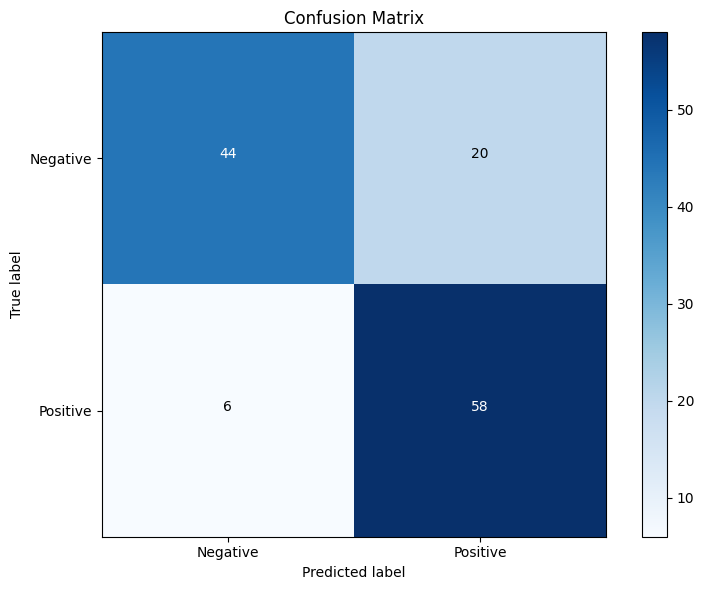

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools


true_labels = np.array(tlabels)
predicted_labels = np.array(plabel)


cm = confusion_matrix(true_labels, predicted_labels)


plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = ['Negative', 'Positive']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

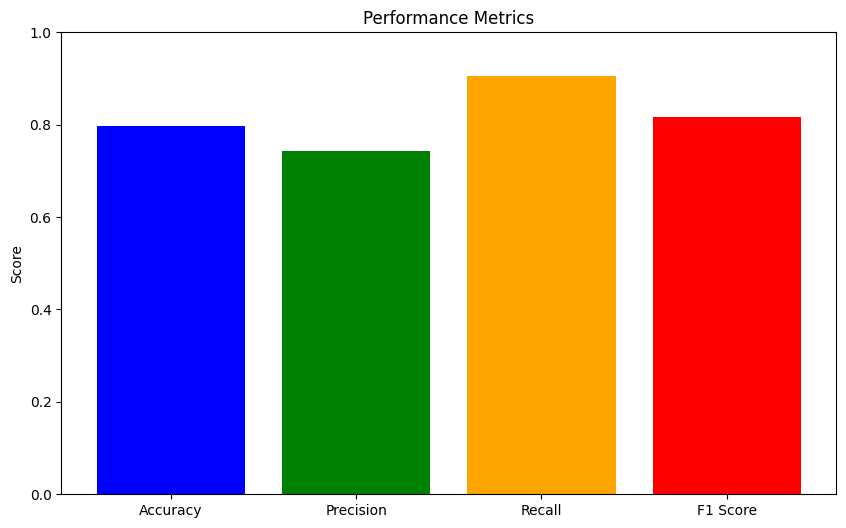

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score


true_labels = np.array(tlabels)
predicted_labels = np.array(plabel)

accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels)


metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])
plt.title('Performance Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.show()